In [5]:
import os

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def plot(model_name: str, algorithms: list[str], metrics=("score", "gsm8k", "math"), min_step=0) -> None:
    # Create a figure with one row of subplots
    fig, axs = plt.subplots(1, len(metrics), figsize=(len(metrics) * 4, 5), squeeze=False)
    axs = axs.flatten()

    # Plot each metric
    for metric, ax in zip(metrics, axs):
        for algorithm in algorithms:
            path = f"results/{model_name}/{algorithm}/{metric}.csv"
            if os.path.exists(path):
                df = pd.read_csv(path)
                df = df[df["Step"] >= min_step]
                ax.plot(df["Step"], df["Value"], label=algorithm.replace("_", " "))
        ax.grid(True)
        ax.set_title(metric)
        ax.set_xlabel("Training Step")
        ax.set_ylabel("Accuracy")

    # Gather handles & labels from the first axis (they're the same across all)
    handles, labels = axs[0].get_legend_handles_labels()

    # Tight layout, then make room at bottom, then add one legend
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # increase if your legend is crowded
    fig.legend(handles, labels, loc="lower center", ncol=len(algorithms), frameon=False, bbox_to_anchor=(0.5, 0.0))

    plt.show()

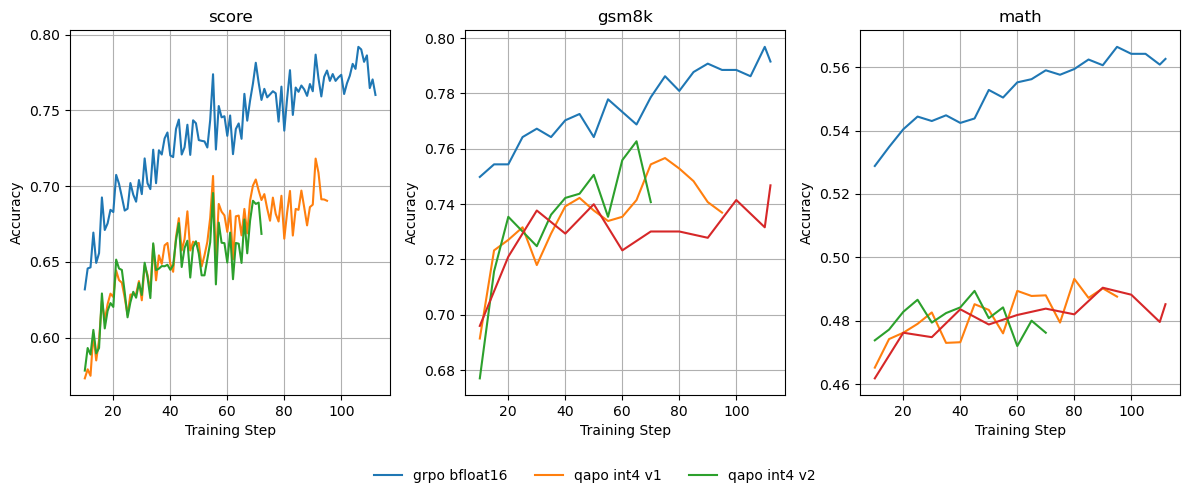

In [17]:
plot("Qwen2.5-1.5B-Instruct", ["grpo_bfloat16", "qapo_int4_v1", "qapo_int4_v2", "grpo_int4"], min_step=10)